# **Submission Analisis Data Dengan Python : Bike Sharing 🚴**
Informasi Author ✋
- 📛 Nama : Mochammad Qaysa Al-Haq
- 📧 Email : qaysa78@gmail.com
- 🆔 Dicoding : mochammadqaysa





# **Pertanyaan Bisnis yang Terlintas**


1.   Bagaimana pola / tren penyewaan sepeda berdasarkan musim (musim semi, panas, gugur, dan dingin)?

2.   Bagaimana pola tingkat penyewaan sepeda pada hari kerja dibandingkan dengan hari libur?

3.   Bagaimana hubungan antara jumlah pengguna kasual , pengguna terdaftar , dan total penyewaan sepeda?



## **Memanggil semua library/package yang dibutuhkan 📦**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Proses Data Wrangling 👟**
### Gathering Data 👪

* Dataframe **days_df** yang diperoleh dari **day.csv**


In [2]:
days_df = pd.read_csv("https://raw.githubusercontent.com/mochammadqaysa/submission-analysis-data/main/data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


* Dataframe **hour_df** yang diperoleh dari **hour.csv**

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/mochammadqaysa/submission-analysis-data/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data 🎓

1. Dataframe **days_df**

* **Cek Tipe Data & Jumlah Data**


In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


> Berdasarkan informasi tipe data pada dataframe **days_df**, kolom **dteday** seharusnya memiliki tipe data **datetime** bukan **object**

* **Cek Missing Value Pada Setiap Column**

In [5]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


* **Cek Duplikasi Data**

In [6]:
print("Jumlah duplikasi data: ", days_df.duplicated().sum())


Jumlah duplikasi data:  0


> Berdasarkan informasi missing value dan duplikasi data, maka pada dataframe **days_df** tidak terdapat **missing value** dan **duplikasi data**

* **Ringkasan Parameter Statistik**

In [7]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


2. Dataframe **hour_df**

* **Cek Tipe Data & Jumlah Data**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


> Berdasarkan informasi tipe data pada dataframe **hour_df**, kolom **dteday** seharusnya memiliki tipe data **datetime** bukan **object**

* **Cek Missing Value Pada Setiap Column**

In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


* **Cek Duplikasi Data**

In [10]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


> Berdasarkan informasi missing value dan duplikasi data, maka pada dataframe **hour_df** tidak terdapat **missing value** dan **duplikasi data**

* **Ringkasan Parameter Statistik**

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data 🧹

1. Dataframe **days_df**

* Ubah Tipe Data kolom **dteday** pada dataframe **days_df**

In [12]:
days_df["dteday"] = pd.to_datetime(days_df["dteday"])
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

2. Dataframe **hour_df**

* Ubah tipe data kolom **dteday** pada dataframe **hour_df**

In [13]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## **Proses Exploratory Data Analysis 👟**
### Eksplorasi Data **days_df** 📆

* **Ringkasan Parameter Statistik**

In [14]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


* **penggunaan sepeda berdasarkan musim (musim semi, panas, gugur, dan dingin)**

In [15]:
days_df['season'] = days_df['season'].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
days_df.groupby('season').agg({
    'instant': ['count'],
    'cnt': ['max', 'min', 'mean', 'sum','std']
    })

instant   cnt                                         
         count   max   min         mean      sum          std
season                                                       
Fall       188  8714  1115  5644.303191  1061129  1459.800381
Spring     181  7836   431  2604.132597   471348  1399.942119
Summer     184  8362   795  4992.331522   918589  1695.977235
Winter     178  8555    22  4728.162921   841613  1699.615261

> Dapat terlihat pada data diatas, **musim gugur** merupakan musim yang **paling banyak orang menggunakan sepeda** dan **musim semi** merupakan musim yang **paling sedikit orang yang menggunakan sepeda.**

> Saya menggunakan panduan pada [tautan ini](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) yang menyatakan bahwa pada kolom **season** memiliki format seperti berikut : <br>
**1** : **Spring** <br>
**2** : **Summer** <br>
**3** : **Fall** <br>
**4** : **Winter**




* **penggunaan sepeda berdasarkan hari kerja dan hari libur (Working Day & Holiday)**

In [16]:
days_df["workingday"] = days_df["workingday"].replace({0: "Holiday", 1: "Working Day"})
days_df.groupby('workingday').agg({
    'instant': ['count'],
    'cnt': ['max', 'min', 'mean', 'sum','std']
    })

instant   cnt                                        
              count   max  min         mean      sum          std
workingday                                                       
Holiday         231  8714  605  4330.168831  1000269  2052.141245
Working Day     500  8362   22  4584.820000  2292410  1878.415583

> Dapat terlihat pada data diatas, pada saat **hari kerja** jumlah penyewa sepeda **melonjak tinggi**

* **penggunaan sepeda setiap tahun berdasarkan pengguna yang terdaftar dan yang kasual/tidak terdaftar**

In [17]:
days_df["yr"] = days_df["yr"].replace({0: "2011", 1: "2012"})
days_df.groupby('yr').agg({
    'instant': ['count'],
    'registered': ['sum'],
    'casual': ['sum'],
    'cnt': ['max', 'min', 'mean', 'sum','std']
    })

instant registered  casual   cnt                                        
       count        sum     sum   max  min         mean      sum          std
yr                                                                           
2011     365     995851  247252  6043  431  3405.761644  1243103  1378.753666
2012     366    1676811  372765  8714   22  5599.934426  2049576  1788.667868

> Dapat terlihat pada data diatas, pada tahun **2012** terjadi peningkatan jumlah penyewa yang sangat signifikan jika dibandingkan dengan jumlah penyewa pada tahun **2011**.

> Penyewa yang **terdaftar** menjadi jumlah terbanyak dibanding dengan yang **kasual**

In [18]:
days_df["weathersit"] = days_df["weathersit"].replace({1: "Clear", 2: "Mist + Cloudy", 3: "Light Snow", 4: "Heavy Rain"})
days_df.groupby('weathersit').agg({
    'instant': ['count'],
    'cnt': ['max', 'min', 'mean', 'sum','std']
    })

instant   cnt                                        
                count   max  min         mean      sum          std
weathersit                                                         
Clear             463  8714  431  4876.786177  2257952  1879.483989
Light Snow         21  4639   22  1803.285714    37869  1240.284449
Mist + Cloudy     247  8362  605  4035.862348   996858  1809.109918

> Dapat terlihat pada data diatas, pada saat *Hujan Deras* **Tidak ada** yang menyewa sepeda, dan pada saat *Langit Cerah* banyak yang menyewa sepeda.

* **korelasi antar numeric features menggunakan heatmap**

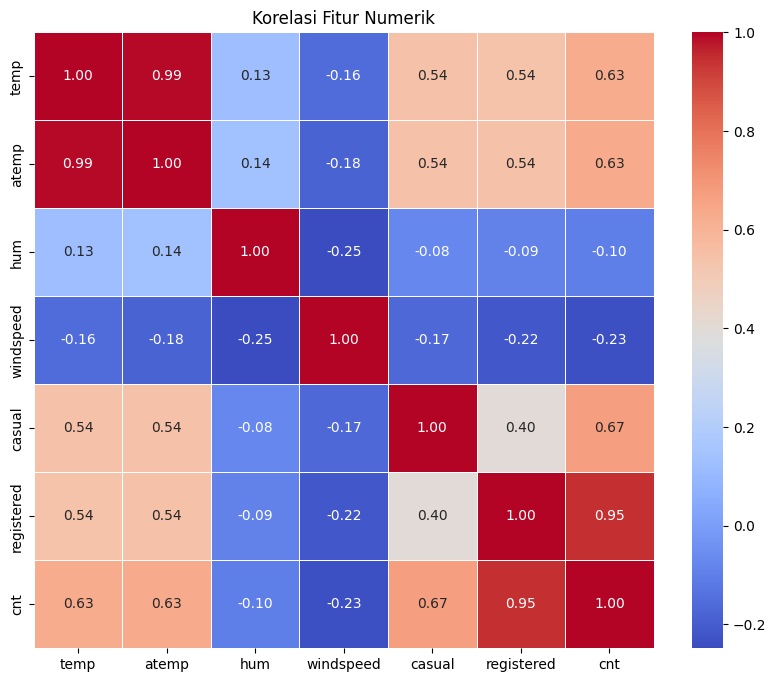

In [19]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = days_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Fitur Numerik')
plt.show()

## **Proses Visualization & Explanatory Analysis 📊**
### **1. Bagaimana pola / tren penyewaan sepeda berdasarkan musim (musim semi, panas, gugur, dan dingin)?**

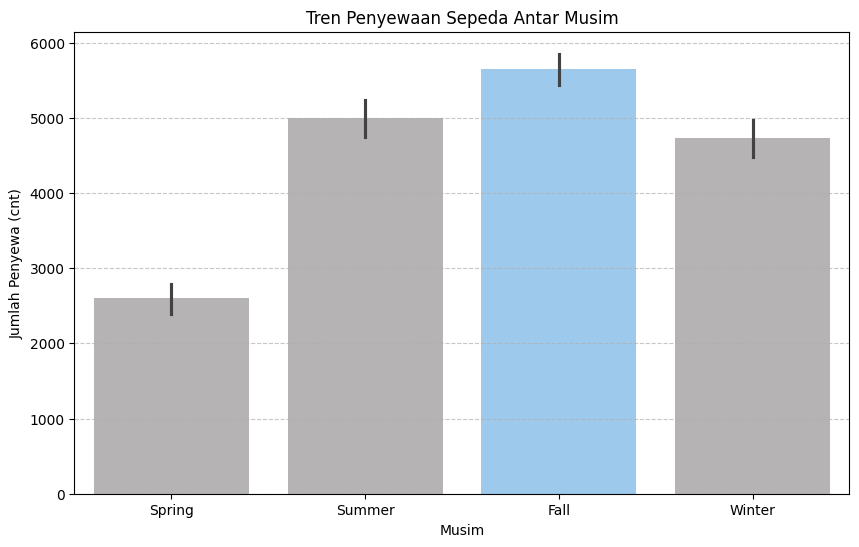

In [20]:
colors = ["#b5b3b3", "#b5b3b3", "#90CAF9", "#b5b3b3"]

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    y="cnt",
    x="season",
    hue="season",
    data=days_df,
    palette=colors,
    ax=ax,
    dodge=False,
    order=["Spring", "Summer", "Fall", "Winter"]
)

ax.set_title("Tren Penyewaan Sepeda Antar Musim", loc="center")
ax.set_ylabel('Jumlah Penyewa (cnt)')
ax.set_xlabel('Musim')
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Dari grafik yang dibuat, terlihat bahwa jumlah penyewaan sepeda tertinggi terjadi pada **musim Panas (Summer)** dan **Gugur (Fall)**, sementara jumlah penyewaan lebih rendah pada **musim Dingin (Winter)** dan **Semi (Spring)**. Hal ini menunjukkan bahwa cuaca dan kondisi lingkungan yang hangat cenderung meningkatkan minat masyarakat untuk menggunakan sepeda, baik untuk rekreasi maupun transportasi.

### **2. Bagaimana pola tingkat penyewaan sepeda pada hari kerja dibandingkan dengan hari libur?**

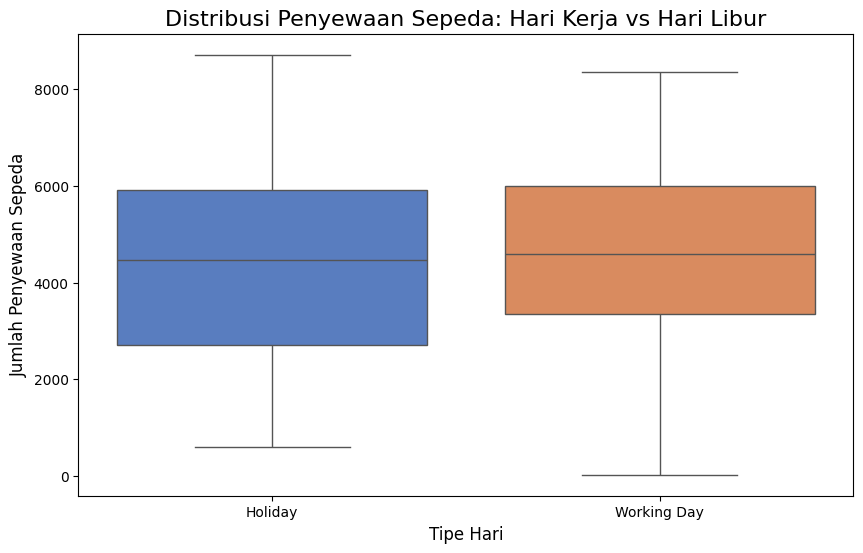

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=days_df,
    x='workingday',
    y='cnt',
    hue='workingday',
    palette="muted",
    dodge=False
)
plt.title("Distribusi Penyewaan Sepeda: Hari Kerja vs Hari Libur", fontsize=16)
plt.xlabel("Tipe Hari", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.legend([], [], frameon=False)
plt.show()

Pola distribusi penyewaan sepeda menunjukkan bahwa jumlah penyewaan cenderung lebih tinggi pada **hari kerja** dibandingkan **hari libur**. Hal ini mungkin disebabkan oleh pengguna terdaftar yang menggunakan sepeda untuk perjalanan rutin, seperti pergi ke kantor atau tempat kerja. Sebaliknya, pada hari libur, penyewaan didominasi oleh pengguna kasual yang cenderung lebih sedikit.

### **3. Bagaimana hubungan antara jumlah pengguna kasual , pengguna terdaftar , dan total penyewaan sepeda?**

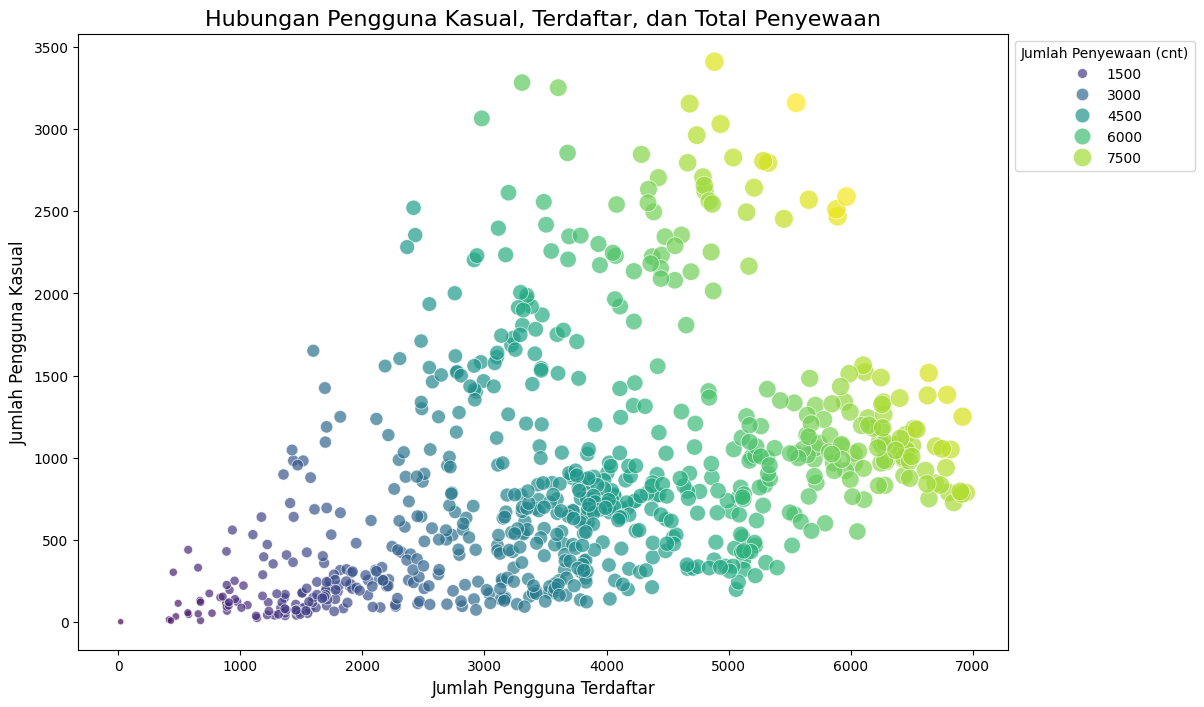

In [22]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=days_df,
    x='registered',
    y='casual',
    size='cnt',
    hue='cnt',
    sizes=(20, 200),
    palette="viridis",
    alpha=0.7
)
scatter.set_title("Hubungan Pengguna Kasual, Terdaftar, dan Total Penyewaan", fontsize=16)
scatter.set_xlabel("Jumlah Pengguna Terdaftar", fontsize=12)
scatter.set_ylabel("Jumlah Pengguna Kasual", fontsize=12)
plt.legend(title="Jumlah Penyewaan (cnt)", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

**Analisis scatterplot menunjukkan bahwa:**

* Jumlah **pengguna terdaftar (registered)** berkontribusi signifikan terhadap total penyewaan sepeda, dengan jumlah yang lebih stabil dan tinggi.
* **Pengguna kasual (casual)** lebih fluktuatif dan cenderung meningkat pada hari-hari tertentu, seperti akhir pekan atau hari libur.
* Kedua kategori pengguna (kasual dan terdaftar) memiliki hubungan positif terhadap total penyewaan, dengan kontribusi pengguna terdaftar yang lebih dominan.

## **Conclusion ✍**

* Penyewaan sepeda sangat dipengaruhi oleh **musim** dan **hari kerja**. Musim panas dan hari kerja memberikan kontribusi terbesar pada jumlah penyewaan.
* **Pengguna terdaftar** adalah segmen utama yang mendukung operasi sistem penyewaan sepeda, sedangkan **pengguna kasual** cenderung bersifat musiman atau situasional.
* Tren ini dapat digunakan untuk merencanakan strategi pemasaran dan pengelolaan operasional, seperti meningkatkan promosi pada musim dingin atau menyediakan fasilitas tambahan pada hari kerja untuk memenuhi kebutuhan pengguna terdaftar.

In [23]:
days_df.to_csv("/content/days_dataframe.csv", index=False)
